<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/05_mod_01_ap_sup_regressao_01_linear_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

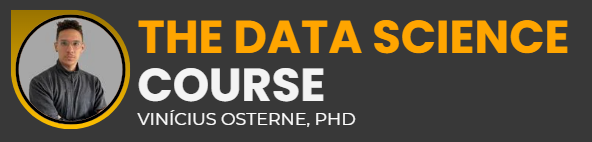

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelo de Regressão Linear Simples

---

🎯 Roteiro

- Conceituação
  - Motivação – por que usar esse modelo.
  - Estrutura do Modelo – como ele é definido matematicamente.
  - Suposições – quando ele é adequado.
  - Estimação – como encontrar os parâmetros.
  - Inferência – o que os testes e intervalos dizem sobre esses parâmetros.
  - Interpretação – traduzir os coeficientes para o contexto do problema.
  - Diagnóstico – conferir se o modelo realmente se ajusta bem.

- Aplicação Prática

---
# Conceituação


## Motivação
- Modelo usado para **relacionar duas variáveis quantitativas**.
- Objetivo: prever a variável **dependente** (resposta) a partir de uma variável **independente** (preditor).
- Resolve problemas de **previsão** e **entendimento da relação linear**.
- Adequado quando há **apenas um preditor** e a relação esperada é linear.
- Exemplo: prever consumo de combustível de um carro pela velocidade média.


## Estrutura do Modelo
- Forma geral:
  $$
  Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
  $$
- Componentes:
  - $ Y_i $: resposta para a i-ésima observação.
  - $ X_i $: preditor para a i-ésima observação.
  - $ \beta_0 $: intercepto (valor esperado de $Y$ quando $X=0$).
  - $ \beta_1 $: inclinação (variação média em $Y$ para cada aumento de 1 unidade em $X$).
  - $ \varepsilon_i $: erro aleatório (média zero, variância constante).


## Suposições
- **Linearidade**: relação entre $X$ e $Y$ é linear.
- **Independência dos erros**: resíduos independentes.
- **Homoscedasticidade**: variância constante dos erros.
- **Normalidade dos erros**: $\varepsilon_i \sim N(0, \sigma^2)$ para inferência.
- **Ausência de outliers influentes**.


## Estimação dos Parâmetros
- Método: **Mínimos Quadrados Ordinários (MQO)**.
- Objetivo: minimizar a soma dos quadrados dos resíduos:
  $$
  \min_{\beta_0, \beta_1} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2\\
  =
  \min_{\beta_0, \beta_1} \sum_{i=1}^n (Y_i - (\beta_0 + \beta_1 X_i))^2
  $$
- Desenvolvendo, chegamos às estimativas:
  $$
  \hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}
  $$
  $$
  \hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}
  $$


## Inferência
- **Teste t para $\beta_1$**:
  - Hipóteses:
    - $H_0: \beta_1 = 0$ → sem relação linear.
    - $H_1: \beta_1 \neq 0$ → relação linear presente.
  - Estatística:
    $$
    t = \frac{\hat{\beta}_1}{EP(\hat{\beta}_1)}
    $$
- **Intervalo de confiança**:
  $$
  \hat{\beta}_1 \pm t_{\alpha/2, n-2} \cdot EP(\hat{\beta}_1)
  $$


## Interpretação dos parâmetros
- Se $\hat{\beta}_1 > 0$ → relação positiva
- Se $\hat{\beta}_1 < 0$ → relação negativa
- $\hat{\beta}_0$ = valor esperado de $Y$ quando $X = 0$ (interpretar com cuidado)
- Considerar **magnitude** e **contexto** da inclinação para relevância prática


## Diagnóstico

- Linearidade e Homocedasticidade
- Normalidade dos Erros
- Independência dos Erros
- Observações Influentes e Outliers
- Medidas de Ajuste

---

# Aplicação

In [19]:
# Sobre a base de dados

## Reference: Efron, B., Hastie, T., Johnstone, I., Tibshirani, R. (2004). Least Angle Regression. Annals of Statistics, 32(2), 407–499
## Disponível: load_diabetes() se usar scikit-learn e lars se usar R
## Objetivo do estudo: Prever a progressão da doença relacionada ao diabetes após um ano, com base em variáveis clínicas e bioquímicas medidas no momento inicial
## Dados coletados de **442 pacientes** com as seguintes variáveis:
  ### disease_progression: medida quantitativa da evolução da doença após um ano.
  ### bmi: índice de massa corporal (normalizado).
## Razão da escolha: variável contínua fortemente associada a riscos de diabetes, intuitiva para interpretação.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
# ============================================================
# Carregando dados
# ============================================================

In [36]:
diab = datasets.load_diabetes(as_frame=True)
df = diab.frame.copy()
df.rename(columns={"target": "disease_progression"}, inplace=True)

In [37]:
# ============================================================
# Carregando dados
# ============================================================

In [38]:
# Estatísticas descritivas
print("\n=== Estatísticas descritivas ===")
print(df[["bmi", "disease_progression"]].describe().round(3))


=== Estatísticas descritivas ===
           bmi  disease_progression
count  442.000              442.000
mean    -0.000              152.133
std      0.048               77.093
min     -0.090               25.000
25%     -0.034               87.000
50%     -0.007              140.500
75%      0.031              211.500
max      0.171              346.000


In [39]:
# Correlação
corr = df[["bmi", "disease_progression"]].corr().iloc[0, 1]
print(f"\nCorrelação entre BMI e Progressão da Doença: {corr:.3f}")


Correlação entre BMI e Progressão da Doença: 0.586


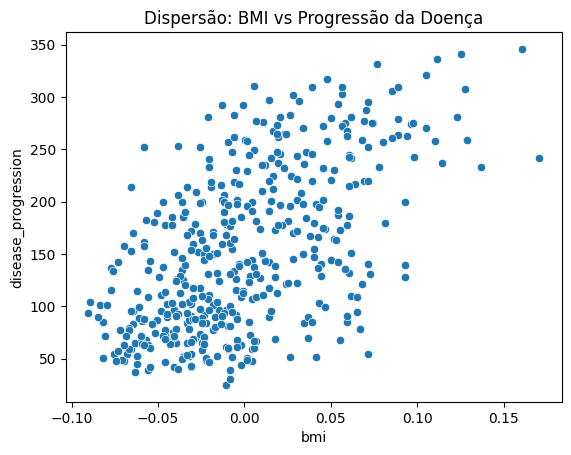

In [40]:
# Dispersão
sns.scatterplot(x="bmi", y="disease_progression", data=df)
plt.title("Dispersão: BMI vs Progressão da Doença")
plt.show()

In [27]:
# ============================================================
# Ajuste do modelo (OLS via fórmula)
# ============================================================

In [41]:
modelo = smf.ols("disease_progression ~ bmi", data=df).fit()

In [42]:
print("\n=== Resumo do Modelo OLS ===")
print(modelo.summary())


=== Resumo do Modelo OLS ===
                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.344
Model:                             OLS   Adj. R-squared:                  0.342
Method:                  Least Squares   F-statistic:                     230.7
Date:                 Mon, 11 Aug 2025   Prob (F-statistic):           3.47e-42
Time:                         23:36:16   Log-Likelihood:                -2454.0
No. Observations:                  442   AIC:                             4912.
Df Residuals:                      440   BIC:                             4920.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [30]:
# ============================================================
# Diagnóstico do modelo
# ============================================================

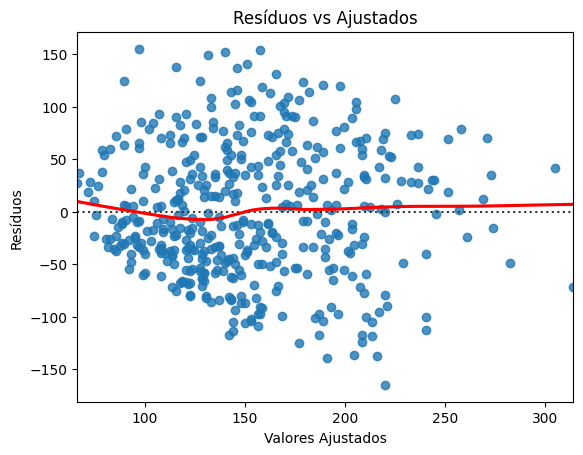

In [43]:
# Resíduos vs Ajustados
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados")
plt.show()

# Atencao:
## Se os resíduos apresentam padrão, isso indica que alguma suposição do modelo foi violada (linearidade, homocedasticidade, independência etc.).
## Se parecem aleatórios, é um sinal de que o modelo capturou bem a relação entre as variáveis.
# Padrões comuns e suas causas:
## Formato em funil (heterocedasticidade) → variância dos erros muda com o valor ajustado.
## Ondas ou curvas → relação não-linear mal capturada.
## Pontos muito distantes → possíveis outliers influentes.

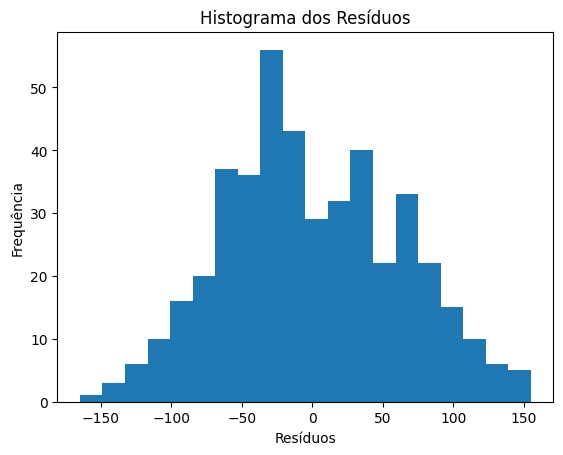

In [44]:
# Histograma dos resíduos
plt.hist(modelo.resid, bins=20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma dos Resíduos")
plt.show()

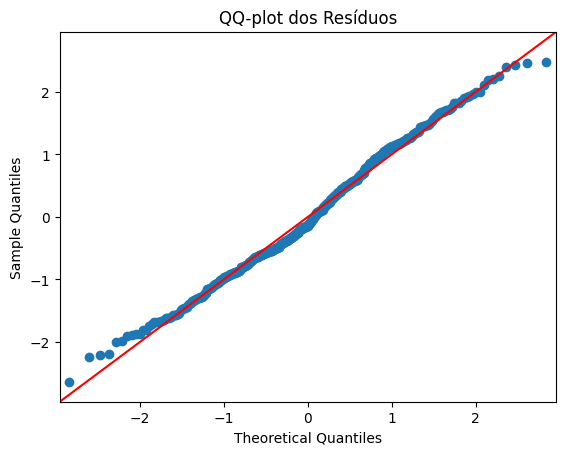

In [45]:
# QQ-plot dos resíduos
sm.qqplot(modelo.resid, line='45', fit=True)
plt.title("QQ-plot dos Resíduos")
plt.show()

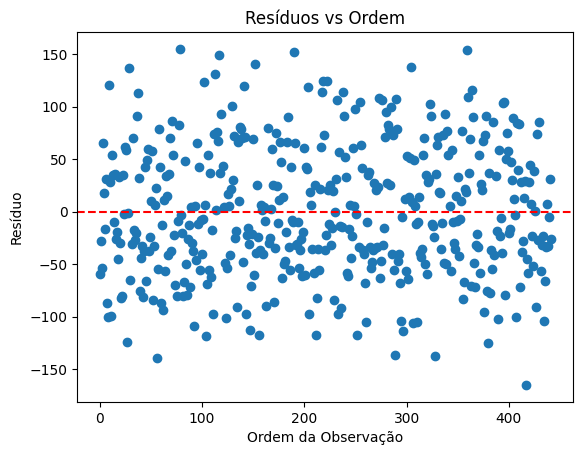

In [47]:
# Resíduos vs Ordem
plt.plot(range(len(modelo.resid)), modelo.resid, marker="o", linestyle="")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Ordem da Observação")
plt.ylabel("Resíduo")
plt.title("Resíduos vs Ordem")
plt.show()

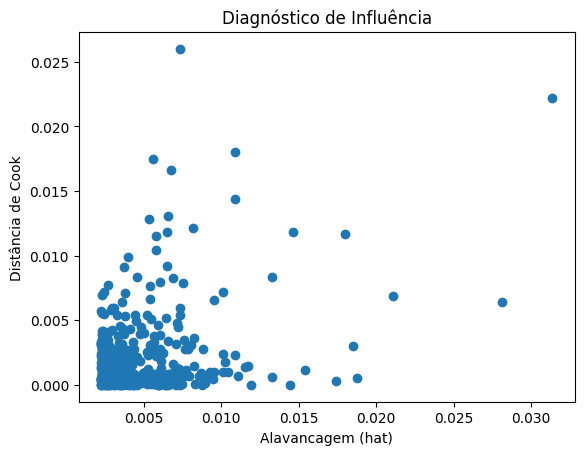

In [48]:
# Influência (alavancagem e distância de Cook)
influence = modelo.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

plt.scatter(leverage, cooks_d)
plt.xlabel("Alavancagem (hat)")
plt.ylabel("Distância de Cook")
plt.title("Diagnóstico de Influência")
plt.show()